In [14]:
import numpy as np
import einops
Nx = 80
Ny = 10
n_particles = Nx*Ny
x = np.zeros((n_particles, 2))
E = np.arange(n_particles)

for i in range(Nx):
    for j in range(Ny):
        x[j*Nx+i] = [(i)/(Nx) * 0.8 + 0.1, (j)/(Ny) * 0.1 + 0.3]



In [56]:
n_blocks_x = 16
n_blocks_y = 2
n_blocks = n_blocks_x * n_blocks_y
E_true = np.arange(n_blocks)

x_rs = einops.rearrange(x, "(y x) d -> x y d", y=Ny, d=2)

block_nx = int(Nx / n_blocks_x)
block_ny = int(Ny / n_blocks_y)

for i in range(Nx):
    for j in range(Ny):
        block_index_x = i // block_nx
        block_index_y = j // block_ny
        E[j*Nx+i] = E_true[block_index_x + block_index_y * n_blocks_x]


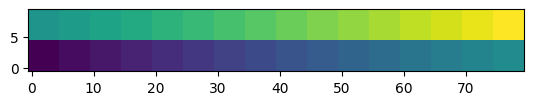

(80, 10)

In [57]:
import matplotlib.pyplot as plt 
E_reshape = einops.rearrange(E, "(y x) -> x y", y=Ny)
plt.imshow(E_reshape.transpose(), origin='lower')
plt.show()
E_reshape.shape

In [4]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt
import json 

ti.reset()
real = ti.f32
ti.init(arch=ti.cuda, default_fp=real, device_memory_GB=12)

Nx = 80  # reduce to 30 if run out of GPU memory
Ny = 10
n_particles = Nx * Ny

dim=2
max_steps = 1024

x = ti.Vector.field(dim,
                    dtype=real,
                    shape=(max_steps, n_particles),
                    needs_grad=True)


for i in range(Nx):
    for j in range(Ny):
        x[0, j * Nx + i] = [(i)/(Nx) * 0.8 + 0.1, (j)/(Ny) * 0.1 + 0.3]


[Taichi] version 1.7.0, llvm 15.0.1, commit 2fd24490, win, python 3.10.13
[Taichi] Starting on arch=cuda
